In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

# Loading the given Dataset

In [9]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 1.Univariate Analysis

<AxesSubplot:xlabel='Gender', ylabel='Count'>

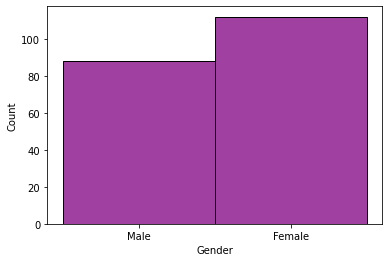

In [10]:
sns.histplot(df["Gender"],color='purple')

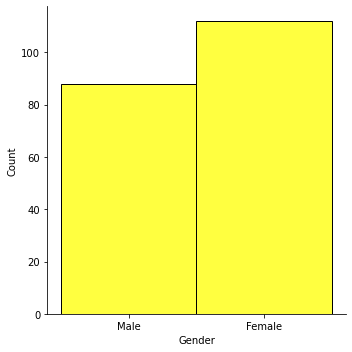

In [11]:
sns.displot(df["Gender"],color='yellow')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

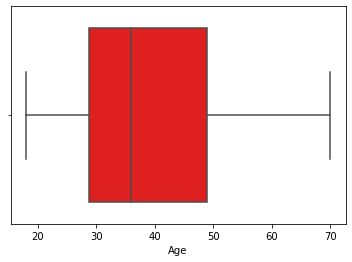

In [12]:
sns.boxplot(df["Age"],color='red')

# 2.Bivariate Analysis


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

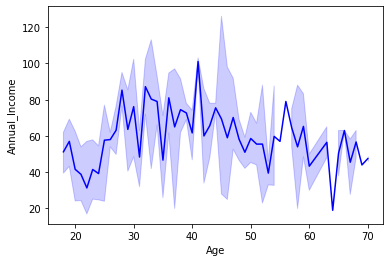

In [13]:
sns.lineplot(df["Age"],df["Annual_Income"], color='blue')

<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

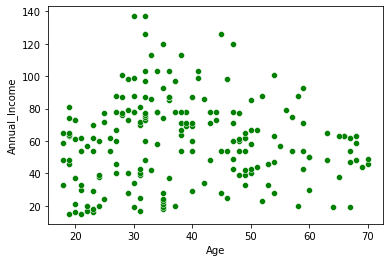

In [14]:
sns.scatterplot(x=df.Age,y=df.Annual_Income,color='green')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

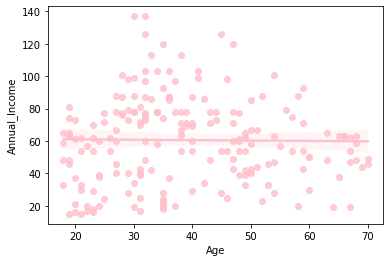

In [15]:
sns.regplot(df['Age'],df['Annual_Income'],color='pink')


# 3.Multivariate Analysis


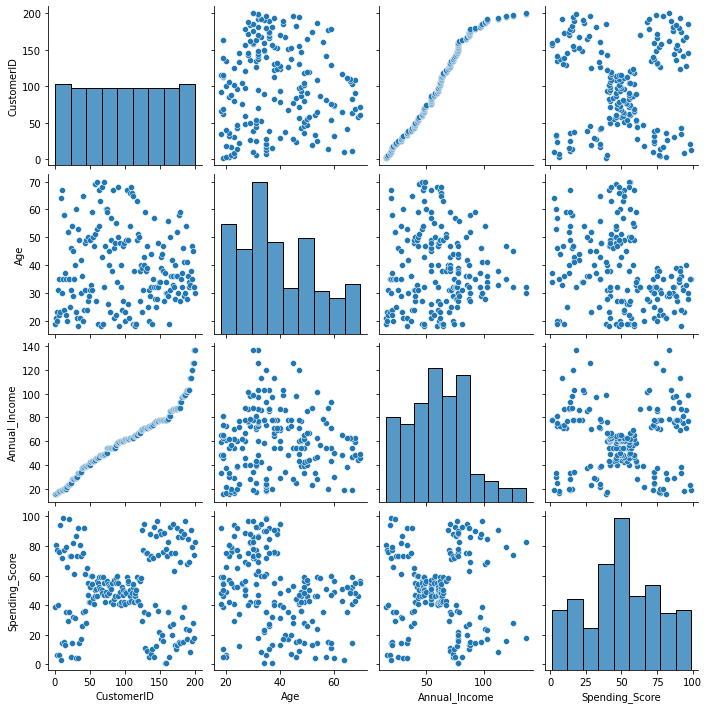

In [16]:
sns.pairplot(data=df[['CustomerID','Age','Annual_Income','Spending_Score']])

# 4. Performing Descriptive Statisics


In [17]:
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 5. Handling Missing Values

In [18]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

# 6. Find the outliers and replace the outliers


In [19]:
outliers=df.quantile(q=(0.25,0.75))

In [20]:
outliers

,CustomerID,Age,Annual_Income,Spending_Score
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [21]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR

In [22]:
df.median(numeric_only=True)

CustomerID        100.5
Age                36.0
Annual_Income      61.5
Spending_Score     50.0
dtype: float64

<AxesSubplot:xlabel='Age'>

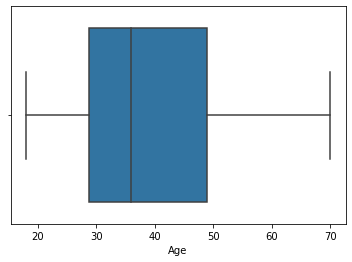

In [23]:
df['Age'] = np.where(df['Age'] < lower_limit, 7, df['Age'])
sns.boxplot(x=df.Age,showfliers = False)

# 7.Checking for Categorical columns and performing encoding.


In [24]:
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df_numeric = df[['CustomerID','Age','Annual_Income','Spending_Score']]
df_categorical = df[['Gender']]

In [26]:
df_numeric.head()

,CustomerID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [27]:
df_categorical.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female


In [28]:
print(df['Gender'].unique())

['Male' 'Female']


In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

gender_encoder = OneHotEncoder()
gender_reshaped = np.array(df_categorical['Gender']).reshape(-1, 1)
gender_values = gender_encoder.fit_transform(gender_reshaped)
print(df_categorical['Gender'][:5])
print()
print(gender_values.toarray()[:5])
print()
print(gender_encoder.inverse_transform(gender_values)[:5])

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]

[['Male']
 ['Male']
 ['Female']
 ['Female']
 ['Female']]


In [30]:
Sex = pd.DataFrame(gender_values.toarray(), columns=['F', 'M'])

In [31]:
df_categorical_encoded = pd.concat([Sex], axis=1)

In [32]:
print(df_categorical_encoded.shape)
df_categorical_encoded.head()

(200, 2)


,F,M
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [33]:
df_new = pd.concat([df_numeric, df_categorical_encoded], axis=1)
print(df_new.shape)
df_new.head()

(200, 6)


,CustomerID,Age,Annual_Income,Spending_Score,F,M
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0


# Split the data into dependent and independent variables.

In [35]:
y = df["Gender"]
y.head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [36]:
x=df.drop(columns=["Gender"],axis=1)
x.head()

,CustomerID,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


# 9.Scaling the Independent Variables


In [37]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,CustomerID,Age,Annual_Income,Spending_Score
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980


# 10.Training and Testing Split


In [38]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [39]:
X_Train.shape

(160, 4)

In [40]:
X_Test.shape

(40, 4)

In [41]:
Y_Train.shape

(160,)

In [42]:
Y_Test.shape

(40,)

In [43]:
X_Train.head()

,CustomerID,Age,Annual_Income,Spending_Score
134,0.597565,-1.352802,0.474828,-1.754735
66,-0.580244,0.297832,-0.479408,-0.007764
26,-1.273073,0.441365,-1.242797,-0.706552
113,0.233830,-1.424569,0.131303,-0.163051
168,1.186470,-0.204535,1.009200,-0.900660


In [44]:
X_Test.head()

,CustomerID,Age,Annual_Income,Spending_Score
18,-1.411639,0.943732,-1.433644,-0.823017
170,1.221111,0.082532,1.009200,-1.444162
107,0.129905,1.087265,0.093133,-0.163051
98,-0.025981,0.656665,0.016795,-0.318337
177,1.342356,-0.850435,1.047369,0.729845


In [45]:
Y_Train.head()

134      Male
66     Female
26     Female
113      Male
168    Female
Name: Gender, dtype: object

In [46]:
Y_Test.head()

18     Male
170    Male
107    Male
98     Male
177    Male
Name: Gender, dtype: object

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [48]:
model.fit(X_Train,Y_Train)

RandomForestClassifier()

In [49]:
Y_Predict=model.predict(X_Test)

In [50]:
Y_Predict_Train=model.predict(X_Train)

# Train the Model

In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
print("Training Accuracy : ",accuracy_score(Y_Train,Y_Predict_Train))

Training Accuracy :  1.0


# Test the Model

In [53]:
print("Testing Accuracy : ",accuracy_score(Y_Test,Y_Predict))

Testing Accuracy :  0.6


# Measure the performance using Metrics.

In [54]:
pd.crosstab(Y_Test,Y_Predict)

col_0,Female,Male
Gender,,
Female,14,6
Male,10,10


In [55]:
print(classification_report(Y_Test,Y_Predict))

              precision    recall  f1-score   support

      Female       0.58      0.70      0.64        20
        Male       0.62      0.50      0.56        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

